In [12]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
%matplotlib inline
votes_file = '../assets/datasets/votes.csv'
airport_file = '../assets/datasets/Airport_operations.csv'

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [13]:
votes = pd.read_csv(votes_file, index_col = 0)

In [14]:
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [15]:
votes = votes.fillna(votes.mode().iloc[0])
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [16]:
votes = votes.apply(lambda x: x.replace('republican', 0))
votes = votes.apply(lambda x: x.replace('democrat', 1))
votes = votes.apply(lambda x: x.replace('y', 1))
votes = votes.apply(lambda x: x.replace('n', 0))

In [17]:
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
2,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
4,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
5,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


Next, let's define the x and y variables: 

In [18]:
X = pd.DataFrame(votes.ix[:, 1:(len(votes.columns))], columns = votes.columns[1:len(votes.columns)])
y = votes.ix[:, 0]

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [19]:
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)
X_corr = pd.DataFrame(np.corrcoef(X_scaled.values.T), columns = X.columns)
X_corr.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V1,1.000000,-0.222983,0.843403,-0.855547,-0.839768,-0.865895,0.824904,0.836442,0.825563,-0.202917,0.412429,-0.865240,-0.849832,-0.863170,0.775968,0.728806
V2,-0.222983,1.000000,-0.292437,0.273204,0.339931,0.353394,-0.409112,-0.333777,-0.383213,-0.302569,0.069595,0.221628,0.393431,0.233243,-0.330163,-0.313059
V3,0.843403,-0.292437,1.000000,-0.986791,-0.967925,-0.912968,0.945658,0.971160,0.959127,-0.073364,0.491208,-0.973722,-0.942456,-0.961356,0.913271,0.878079
V4,-0.855547,0.273204,-0.986791,1.000000,0.975377,0.912541,-0.949058,-0.974719,-0.964826,0.090130,-0.542970,0.975780,0.946825,0.965857,-0.930583,-0.873626
V5,-0.839768,0.339931,-0.967925,0.975377,1.000000,0.954619,-0.975276,-0.992109,-0.988176,0.061867,-0.455171,0.956339,0.961930,0.970459,-0.939471,-0.868582
V6,-0.865895,0.353394,-0.912968,0.912541,0.954619,1.000000,-0.945915,-0.945560,-0.950223,0.096107,-0.362694,0.914821,0.939538,0.941981,-0.909998,-0.827762
V7,0.824904,-0.409112,0.945658,-0.949058,-0.975276,-0.945915,1.000000,0.977677,0.972398,-0.042165,0.363306,-0.939319,-0.959485,-0.939992,0.906931,0.879885
V8,0.836442,-0.333777,0.971160,-0.974719,-0.992109,-0.945560,0.977677,1.000000,0.983599,-0.061159,0.426195,-0.962218,-0.959135,-0.964080,0.921693,0.881217
V9,0.825563,-0.383213,0.959127,-0.964826,-0.988176,-0.950223,0.972398,0.983599,1.000000,-0.039301,0.391156,-0.949948,-0.950581,-0.951707,0.915548,0.862227
V10,-0.202917,-0.302569,-0.073364,0.090130,0.061867,0.096107,-0.042165,-0.061159,-0.039301,1.000000,-0.192245,0.094026,0.062371,0.127302,-0.114477,-0.032373


Now, let's check the eigenvalues: 

In [31]:
eig_vals, eig_vecs = np.linalg.eig(X_corr)
eigs = pd.DataFrame(zip(eig_vals, eig_vecs), columns = ['eig_vals', 'eig_vecs'])
eigs = pd.DataFrame(eigs.sort('eig_vals', ascending = False), columns = ['eig_vals', 'eig_vecs'])

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


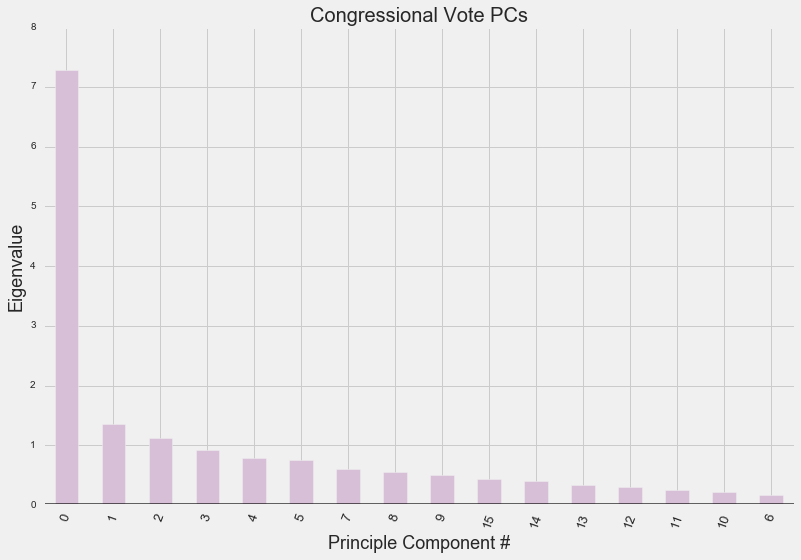

In [32]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

eigs['eig_vals'].plot.bar(color = 'thistle')

plt.title('Congressional Vote PCs', fontsize = 20)

# y label
plt.ylabel('Eigenvalue', fontsize = 18)

# x label
plt.xlabel('Principle Component #', fontsize = 18)

plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)
plt.show()

And the eigenvectors (first five in order of eigenvalue magnitude): 

In [37]:
count = 0
for vec in eig_vecs:
    print 'eigenvector %s' %count
    print vec
    print '\n'
    count += 1
    if count == 5:
        break

eigenvector 0
[-0.18614666 -0.16712469 -0.20712171  0.20152543  0.83216488  0.03787888
 -0.06303172  0.09980716  0.06774333  0.320077   -0.00905883 -0.02550749
 -0.07684624 -0.09620243  0.1492492  -0.02885291]


eigenvector 1
[ 0.04811044 -0.62022238  0.09333145  0.52408655 -0.2388129   0.32252284
 -0.01509023  0.14925179 -0.2105998  -0.03161814 -0.00388437  0.12777571
  0.11740801 -0.11505071  0.05720367 -0.23256923]


eigenvector 2
[-0.29364178 -0.10059273  0.20845746  0.06455564  0.02805272 -0.04949978
 -0.2055437  -0.22668074  0.35515434 -0.04036351 -0.20874446 -0.00929164
  0.72681104  0.11574014  0.04469978  0.20997993]


eigenvector 3
[ 0.31231224  0.15341156 -0.12217327  0.08124124 -0.00098399  0.0101907
 -0.32977655  0.20700723 -0.23747387  0.10331597 -0.64479366 -0.41623561
  0.09245677  0.14241991 -0.09785321 -0.10584997]


eigenvector 4
[ 0.32503296 -0.05981094  0.03417038  0.05696629  0.14662218 -0.10512792
  0.75931894  0.1387707   0.24930897 -0.00743296 -0.28869088  0.14

To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

In [30]:
eigs

,eig_vals,eig_vecs
0,7.273355,"[-0.186146658405, -0.167124688103, -0.20712170..."
1,1.356523,"[0.048110436934, -0.620222384434, 0.0933314536..."
2,1.119554,"[-0.293641777612, -0.100592730994, 0.208457464..."
3,0.913477,"[0.312312241619, 0.153411558368, -0.1221732681..."
4,0.791832,"[0.325032956798, -0.0598109445777, 0.034170383..."
5,0.761317,"[0.255119941735, -0.133955604514, 0.3699699589..."
7,0.611869,"[-0.315353717127, 0.0518263697336, 0.105871401..."
8,0.547869,"[-0.302870670424, 0.148526847474, 0.0366953644..."
9,0.507345,"[0.0100963969176, 0.389741238987, 0.6639994198..."
15,0.441569,"[-0.190203727646, 0.0536147926607, 0.334378475..."


Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [35]:
totalEigen = sum(eigs['eig_vals'])
varExpl = [(i / totalEigen)*100 for i in sorted(eigs['eig_vals'], reverse=True)]
cumulvarExpl = np.cumsum(varExpl)
cumulvarExpl

array([ 45.45846925,  53.93673981,  60.93395415,  66.6431839 ,
        71.59213113,  76.35036514,  80.17454806,  83.5987313 ,
        86.76963667,  89.52944459,  92.01787177,  94.0857369 ,
        95.99390618,  97.5576706 ,  98.96971573, 100.        ])

Now, calculate the explained variance and the Cumulative explained variance

Now, conduct a PCA using scikit learn

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Case #2: Airport Delays

First, let's define the x and y variables: Airport is going to be our target variable

Then, standardize the x variable for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results above to guide your selection of n components

**Bonus**: build and contrast classification models to predict the target classes for each problem, using both the original (or n-best) features and the principal components. If you arrive at <= 3-dimensional feature space, try plotting your data!